# Feature Engineering Examples: Binning Numerical Features

In this notebook, we will explore various techniques for binning numerical features as described in the article [Feature Engineering Examples: Binning Numerical Features](https://towardsdatascience.com/feature-engineering-examples-binning-numerical-features-7627149093d). Binning, also known as discretization, is the process of converting continuous data into discrete bins or intervals. This can be useful for both statistical analysis and machine learning.

We will cover the following binning techniques:
1. Fixed-Width Binning
2. Quantile Binning
3. Custom Binning
4. Binning using `KBinsDiscretizer` from `sklearn`


## 1. Fixed-Width Binning

Fixed-width binning involves dividing the range of the data into intervals of equal width. This method is straightforward but can result in bins with very different frequencies if the data is not uniformly distributed.


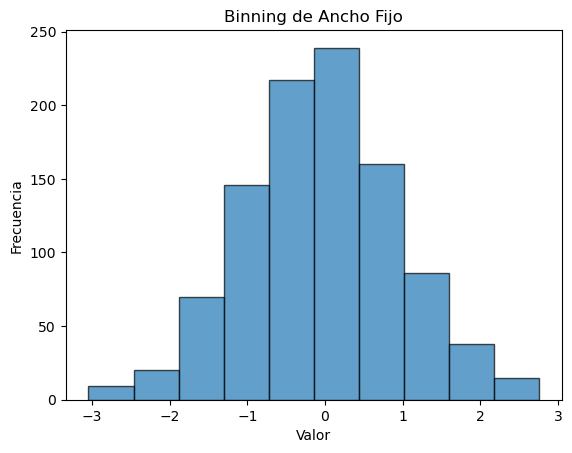

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo
np.random.seed(0)
data = np.random.randn(1000)

# Binning de ancho fijo
bins = np.linspace(min(data), max(data), 11)  # 10 bins de igual ancho
labels = [f'Bin {i}' for i in range(1, len(bins))]
data_binned = pd.cut(data, bins=bins, labels=labels, include_lowest=True)

# Graficar los resultados
plt.hist(data, bins=bins, edgecolor='k', alpha=0.7)
plt.title('Binning de Ancho Fijo')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


## 2. Quantile Binning

Quantile binning involves dividing the data into intervals such that each bin contains approximately the same number of observations. This is useful for ensuring that each bin has the same weight in terms of the number of data points.


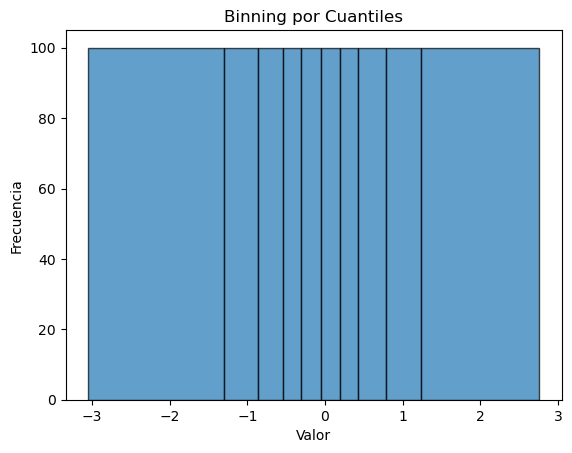

In [2]:
# Binning por cuantiles
quantiles = np.percentile(data, np.linspace(0, 100, 11))
labels_quantiles = [f'Quantile {i}' for i in range(1, len(quantiles))]
data_quantile_binned = pd.cut(data, bins=quantiles, labels=labels_quantiles, include_lowest=True)

# Graficar los resultados
plt.hist(data, bins=quantiles, edgecolor='k', alpha=0.7)
plt.title('Binning por Cuantiles')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


## 3. Custom Binning

Custom binning allows you to define the bin edges explicitly based on domain knowledge or specific requirements. This gives you flexibility in how the data is binned.


c:\Users\CursosTardes\anaconda3\Lib\site-packages\matplotlib\axes\_axes.py:6890: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


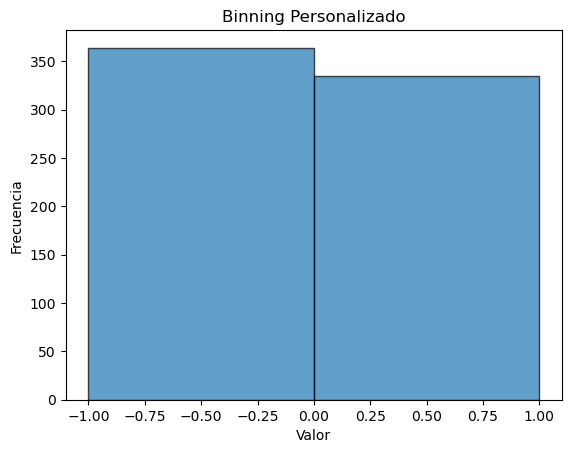

In [3]:
# Binning personalizado
custom_bins = [-np.inf, -1, 0, 1, np.inf]
labels_custom = ['Bajo', 'Por Debajo del Promedio', 'Por Encima del Promedio', 'Alto']
data_custom_binned = pd.cut(data, bins=custom_bins, labels=labels_custom)

# Graficar los resultados
plt.hist(data, bins=custom_bins, edgecolor='k', alpha=0.7)
plt.title('Binning Personalizado')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()


4. Binning usando KBinsDiscretizer de sklearn

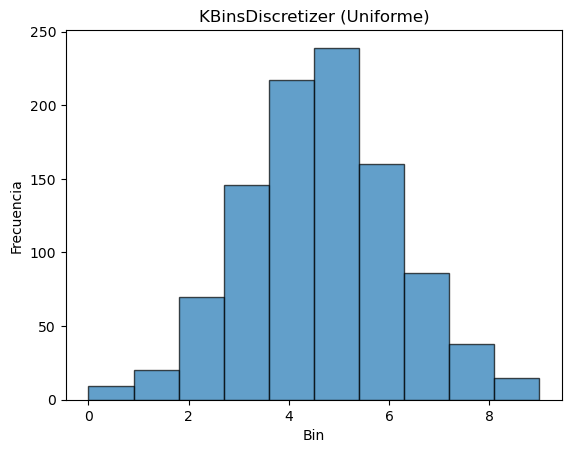

In [4]:
from sklearn.preprocessing import KBinsDiscretizer

# Usando KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
data_kbins_binned = kbins.fit_transform(data.reshape(-1, 1))

# Graficar los resultados
plt.hist(data_kbins_binned, bins=10, edgecolor='k', alpha=0.7)
plt.title('KBinsDiscretizer (Uniforme)')
plt.xlabel('Bin')
plt.ylabel('Frecuencia')
plt.show()
